In [ ]:
!pip install opencv-python
!pip install matplotlib

In [ ]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#set default figure size
plt.rcParams['figure.figsize'] = [8, 6]

In [ ]:
ipath = "./data/rabbit2.png"
image = cv2.imread(ipath)

In [ ]:
if image is None:
    print("Lỗi: Không thể tải ảnh. Kiểm tra đường dẫn.")
else:
    print("Ảnh đã được tải thành công!")

Ảnh đã được tải thành công!


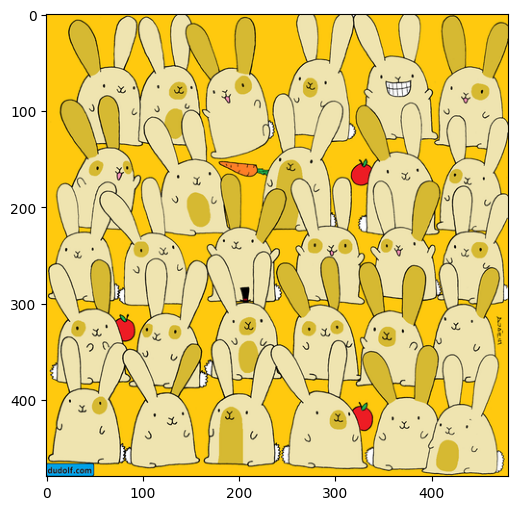

In [ ]:
plt.imshow(image[:,:,::-1])
plt.show()

Ý tưởng 1: Đếm ngay lập tức số vật thể xem có ra được số thỏ không

Rabbits in the image :  398


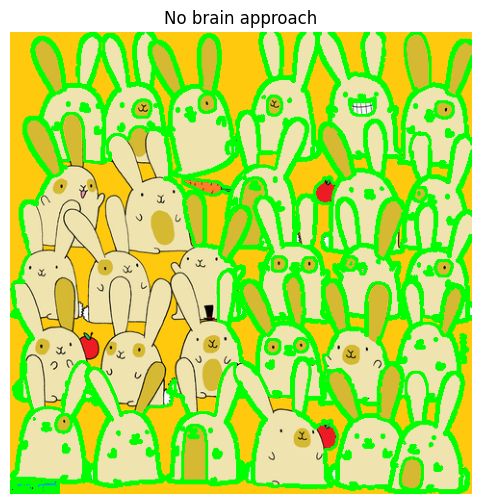

In [ ]:
#Đếm ngay lập tức
ipath = "data/rabbit2.png"
image = cv2.imread(ipath)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 30, 150, 3)

(cnt, hierarchy) = cv2.findContours(
    canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

print("Rabbits in the image : ", len(cnt))

plt.imshow(rgb)
plt.title('No brain approach')
plt.axis('off')
plt.show()

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0, 255, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0,   0,   0]], dtype=uint8)
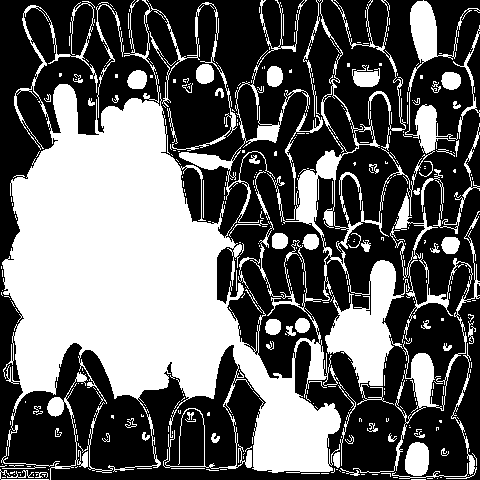

In [ ]:
#Các vật thể được đếm
mask = np.zeros_like(gray)

cv2.drawContours(mask, cnt, -1, (255), thickness=cv2.FILLED)

Rabbits in the image :  137


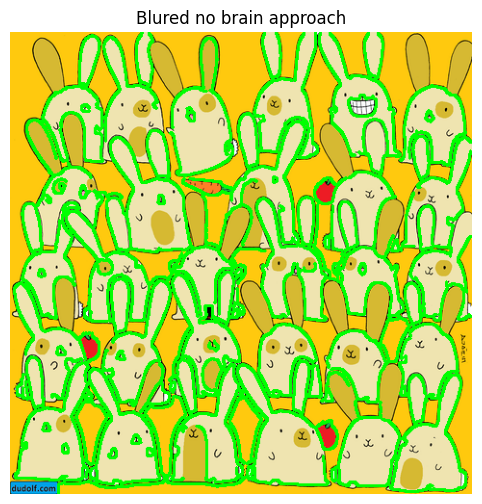

In [ ]:
#Blur trước khi đếm cạnh
ipath = "data/rabbit2.png"
image = cv2.imread(ipath)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (11, 11), 0)
canny = cv2.Canny(blur, 30, 150, 3)

(cnt, hierarchy) = cv2.findContours(
    canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

print("Rabbits in the image : ", len(cnt))

plt.imshow(rgb)
plt.title('Blured no brain approach')
plt.axis('off')
plt.show()

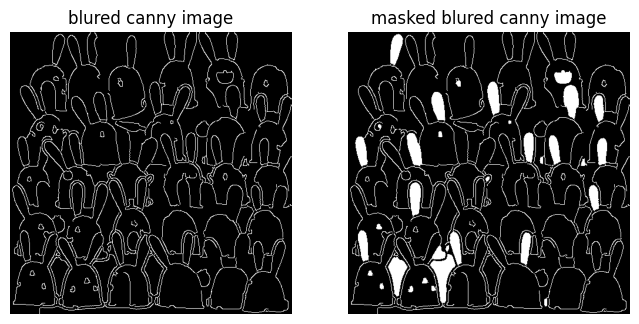

In [ ]:
# Cạnh được phát hiện và các vật thể được đếm
mask = np.zeros_like(gray)

cv2.drawContours(mask, cnt, -1, (255), thickness=cv2.FILLED)

# Ảnh 1
plt.subplot(1, 2, 1)
plt.imshow(canny, cmap = "gray")
plt.title('blured canny image')
plt.axis('off')

# Ảnh 2
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap = "gray")
plt.title('masked blured canny image')
plt.axis('off')

# Hiển thị
plt.show()

Tăng kích thước blur

Rabbits in the image :  52


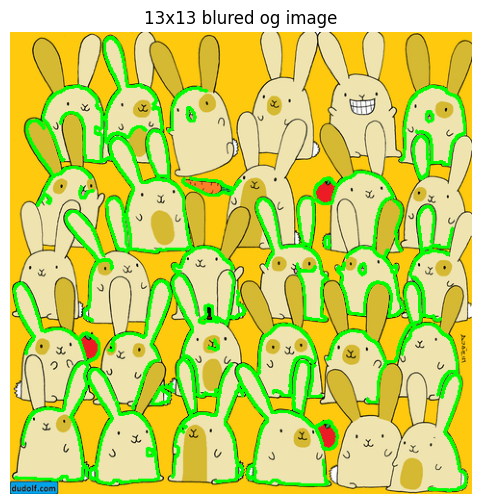

In [ ]:
#filter blur tăng lên 13x13
ipath = "data/rabbit2.png"
image = cv2.imread(ipath)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

adjusted_blur = cv2.GaussianBlur(gray, (13, 13), 0)
adjusted_blur_canny = cv2.Canny(adjusted_blur, 30, 150, 3)

(cnt, hierarchy) = cv2.findContours(
    adjusted_blur_canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

print("Rabbits in the image : ", len(cnt))

plt.imshow(rgb)
plt.title('13x13 blured og image')
plt.axis('off')
plt.show()

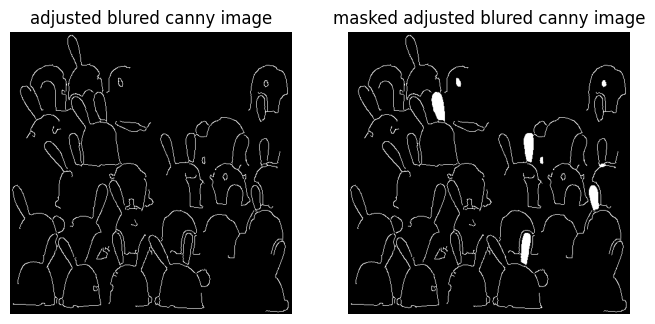

In [ ]:
#Cạnh được phát hiện và các vật thể được đếm của filter blur được tinh chỉnh
adjusted_mask = np.zeros_like(gray)

cv2.drawContours(adjusted_mask, cnt, -1, (255), thickness=cv2.FILLED)

# Ảnh 1
plt.subplot(1, 2, 1)
plt.imshow(adjusted_blur_canny, cmap = "gray")
plt.title('adjusted blured canny image')
plt.axis('off')

# Ảnh 2
plt.subplot(1, 2, 2)
plt.imshow(adjusted_mask, cmap = "gray")
plt.title('masked adjusted blured canny image')
plt.axis('off')

# Hiển thị
plt.show()

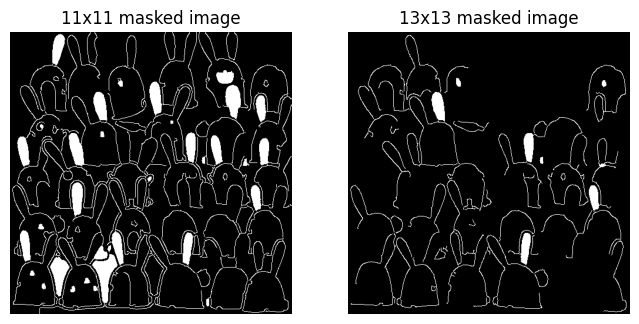

In [ ]:
#So sánh khả năng đếm vật thể của filter blur trước và sau tinh chỉnh
# Ảnh 1
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap = "gray")
plt.title('11x11 masked image')
plt.axis('off')

# Ảnh 2
plt.subplot(1, 2, 2)
plt.imshow(adjusted_mask, cmap = "gray")
plt.title('13x13 masked image')
plt.axis('off')

# Hiển thị
plt.show()

Dilate cho ảnh 11x11 và 13x13

Rabbits in the 11x11 blured image :  65
Rabbits in the 13x13 blured image :  35


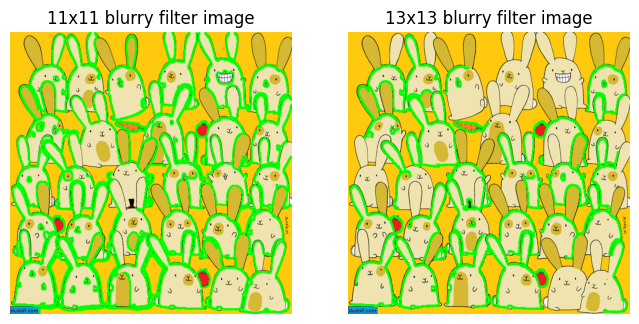

In [ ]:
#filter blur tăng lên 13x13 và thực hiện dilate
ipath = "data/rabbit2.png"
image = cv2.imread(ipath)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

og_blur = cv2.GaussianBlur(gray, (11, 11), 0)
adj_blur = cv2.GaussianBlur(gray, (13, 13), 0)

og_blur_canny = cv2.Canny(og_blur, 30, 150, 3)
adj_blur_canny = cv2.Canny(adj_blur, 30, 150, 3)

og_blur_canny = cv2.dilate(og_blur_canny, (5, 5), iterations=1)
adjusted_blur_canny = cv2.dilate(adj_blur_canny, (5, 5), iterations=1)

(og_cnt, hierarchy) = cv2.findContours(
    og_blur_canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
og_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(og_rgb, og_cnt, -1, (0, 255, 0), 2)

(adj_cnt, hierarchy) = cv2.findContours(
    adjusted_blur_canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
adj_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(adj_rgb, adj_cnt, -1, (0, 255, 0), 2)

print("Rabbits in the 11x11 blured image : ", len(og_cnt))
print("Rabbits in the 13x13 blured image : ", len(adj_cnt))

# Ảnh 1
plt.subplot(1, 2, 1)
plt.imshow(og_rgb, cmap = "gray")
plt.title('11x11 blurry filter image')
plt.axis('off')

# Ảnh 2
plt.subplot(1, 2, 2)
plt.imshow(adj_rgb, cmap = "gray")
plt.title('13x13 blurry filter image')
plt.axis('off')

# Hiển thị
plt.show()

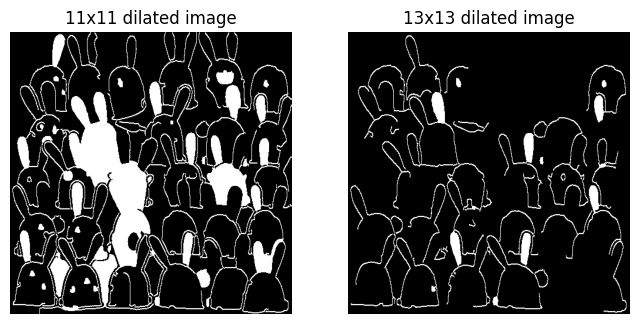

In [ ]:
#Khả năng phát hiện vật thể của 2 filter sau khi áp dụng dilate
og_blur_dilated_mask = np.zeros_like(gray)
adj_blur_dilated_mask = np.zeros_like(gray)

cv2.drawContours(og_blur_dilated_mask, og_cnt, -1, (255), thickness=cv2.FILLED)
cv2.drawContours(adj_blur_dilated_mask, adj_cnt, -1, (255), thickness=cv2.FILLED)

# Ảnh 1
plt.subplot(1, 2, 1)
plt.imshow(og_blur_dilated_mask, cmap = "gray")
plt.title('11x11 dilated image')
plt.axis('off')

# Ảnh 2
plt.subplot(1, 2, 2)
plt.imshow(adj_blur_dilated_mask, cmap = "gray")
plt.title('13x13 dilated image')
plt.axis('off')

# Hiển thị
plt.show()

-> Không dùng filter 13x13 nữa, giữ nguyên filter 11x11

Điều chỉnh Threshold

Rabbits in the image :  201


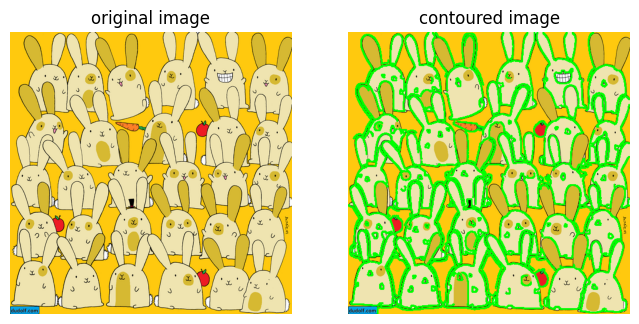

In [ ]:
#điều chỉnh threshold
ipath = "data/rabbit2.png"
image = cv2.imread(ipath)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (11, 11), 0)
canny = cv2.Canny(blur, 50, 130, 3) #tăng threshold dưới từ 30 lên 60

# k = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)) #dilate xong các cạnh bị nối với nhau -> đếm rất tệ
# dilation_canny = cv2.dilate(canny, k, iterations=1)
# erosion_canny = cv2.erode(dilation_canny, k, iterations=1)

(cnt, hierarchy) = cv2.findContours(
    canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

print("Rabbits in the image : ", len(cnt))

# Ảnh 1
plt.subplot(1, 2, 1)
plt.imshow(image[:,:,::-1])
plt.title('original image')
plt.axis('off')

# Ảnh 2
plt.subplot(1, 2, 2)
plt.imshow(rgb)
plt.title('contoured image')
plt.axis('off')

# Hiển thị
plt.show()

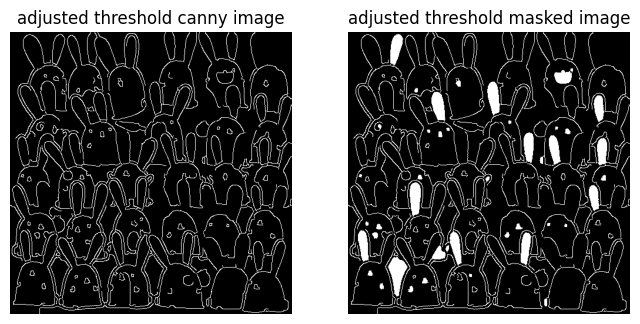

In [ ]:
mask = np.zeros_like(gray)

cv2.drawContours(mask, cnt, -1, (255), thickness=cv2.FILLED)


plt.subplot(1, 2, 1)
plt.imshow(canny, cmap = "gray")
plt.title("adjusted threshold canny image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap = "gray")
plt.title("adjusted threshold masked image")
plt.axis("off")

plt.show()

Rabbits in the low threshold image :  137
Rabbits in the high threshold image :  201


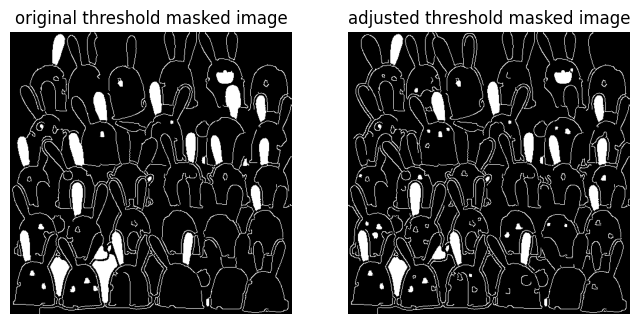

In [ ]:
#so sánh thay đổi threshold
ipath = "data/rabbit2.png"
image = cv2.imread(ipath)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (11, 11), 0)
l_canny = cv2.Canny(blur, 30, 150, 3)
h_canny = cv2.Canny(blur, 50, 130, 3) #tăng threshold dưới từ 30 lên 60

(l_cnt, hierarchy) = cv2.findContours(
    l_canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

(h_cnt, hierarchy) = cv2.findContours(
    h_canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("Rabbits in the low threshold image : ", len(l_cnt))
print("Rabbits in the high threshold image : ", len(h_cnt))

l_mask = np.zeros_like(gray)
h_mask = np.zeros_like(gray)

cv2.drawContours(l_mask, l_cnt, -1, (255), thickness=cv2.FILLED)
cv2.drawContours(h_mask, h_cnt, -1, (255), thickness=cv2.FILLED)

# Ảnh 1
plt.subplot(1, 2, 1)
plt.imshow(l_mask, cmap = "gray")
plt.title('original threshold masked image')
plt.axis('off')

# Ảnh 2
plt.subplot(1, 2, 2)
plt.imshow(h_mask, cmap = "gray")
plt.title('adjusted threshold masked image')
plt.axis('off')

# Hiển thị
plt.show()

Thử lọc diện tích tối thiểu

Rabits in inmage:  29


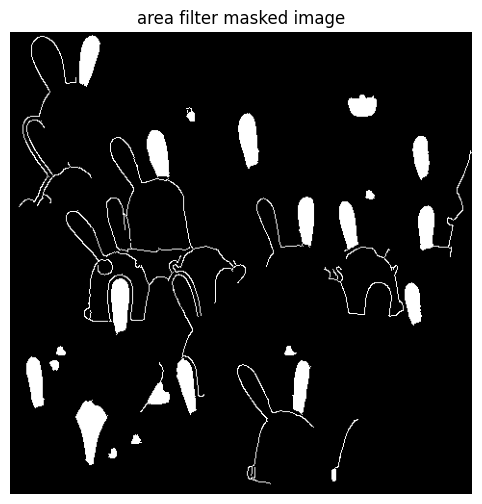

In [ ]:
#so sánh thay đổi threshold
ipath = "data/rabbit2.png"
image = cv2.imread(ipath)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (11, 11), 0)
canny = cv2.Canny(blur, 50, 130, 3) #tăng threshold dưới từ 30 lên 60

# canny = cv2.erode(canny, (3, 3), iterations=1)
# canny = cv2.dilate(canny, (3, 3), iterations=1)

(cnt, hierarchy) = cv2.findContours(
    canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

min_area = 50  # Ngưỡng diện tích tối thiểu (tùy chỉnh theo ảnh)
filtered_contours = [c for c in cnt if cv2.contourArea(c) > min_area]

mask = np.zeros_like(gray)
cv2.drawContours(mask, filtered_contours, -1, (255), thickness=cv2.FILLED)

print("Rabits in inmage: ", len(filtered_contours))

plt.imshow(mask, cmap = "gray")
plt.title('area filter masked image')
plt.axis('off')

# Hiển thị
plt.show()

Thử nghiệm thuật toán watershred

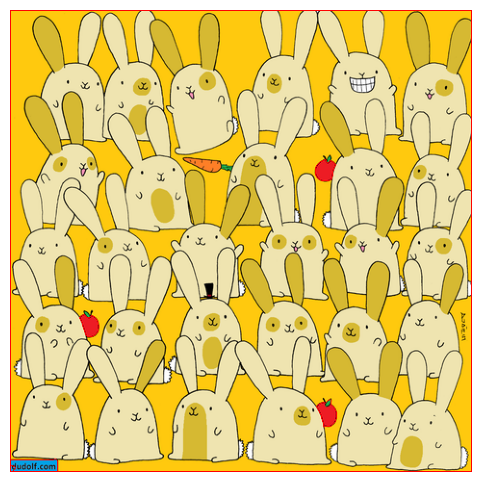

In [ ]:
import cv2
import numpy as np

# Đọc ảnh
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Ngưỡng hóa để tạo ảnh nhị phân
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Loại bỏ nhiễu bằng morphological opening
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Xác định vùng chắc chắn là nền (sure background)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Xác định vùng chắc chắn là tiền cảnh (sure foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Vùng không xác định (unknown region)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Đánh dấu các vùng (markers)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Thêm 1 để tránh nhầm với nền (0)
markers[unknown == 255] = 0  # Đánh dấu vùng không xác định bằng 0

# Áp dụng Watershed
img_watershed = image.copy()
markers = cv2.watershed(img_watershed, markers)
img_watershed[markers == -1] = [0, 0, 255]  # Đánh dấu ranh giới bằng màu đỏ

# Hiển thị kết quả
plt.imshow(img_watershed[:,:,::-1])
plt.axis("off")
# plt.imshow('Watershed Result', img_watershed)
plt.show()